In [1]:
using LinearAlgebra
using Plots

In [2]:
function sum_polygon(E)
    points = [zeros(2,1) E[:,1]]
    previous_point = E[:,1]
    for idx in 2:size(E)[2]
        item = E[:,idx]
        next_point = previous_point + item
        points = [points previous_point next_point]
        #display(points)
        previous_point = next_point
    end
    return points
end

function generate_polygon(n)
    A=randn(n,2)
    Q,=qr(A)
    x=Q[:,1]
    y=Q[:,2]
    z=x+im*y
    e=z.^2
    #print(norm(e[1]+e[2])+e[3]),"\n") # norm of null vector
    #print(norm(e[1])+norm(e[2])+norm([3])) # sum of each edge's norm
    E=[real(e)' ; imag(e)']
    #display(E)
    points = sum_polygon(E)
    #points=[zeros(2,1) E[:,1] E[:,1] E[:,1]+E[:,2] E[:,1]+E[:,2] E[:,1]+E[:,2]+E[:,3] E[:,1]+E[:,2]+E[:,3] E[:,1]+E[:,2]+E[:,3]+E[:,4]]
    return points, Q
end

#generate_polygon(2)

function draw(all_polygons, fps=15)
    anim = @animate for i in 1:length(all_polygons)
        points = all_polygons[i]
        plot(points[1,:],points[2,:], xlim=(-1,1), ylim=(-1, 1))
    end
    return anim
end

draw (generic function with 2 methods)

┌ Info: Saved animation to d:\Docs matheus\UFRJ\IC\Códigos\polygons.gif
└ @ Plots C:\Users\mathe\.julia\packages\Plots\Pe7wF\src\animation.jl:156


Plots.AnimatedGif("d:\\Docs matheus\\UFRJ\\IC\\Códigos\\polygons.gif")
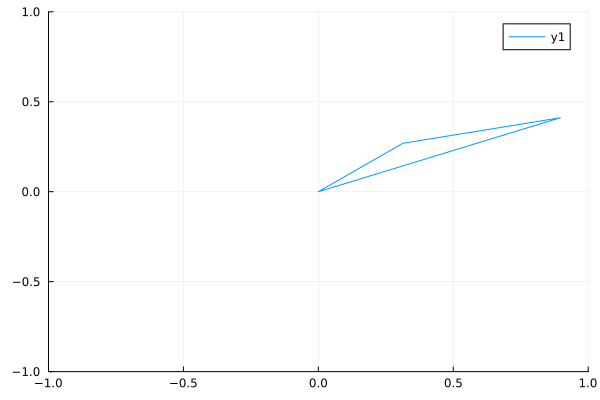

In [3]:
n = 3
fps = 1

pol1, q1 = generate_polygon(n)
pol2, q2 = generate_polygon(n)
pol3, q3 = generate_polygon(n)

polygons = Matrix{Float64}[]
push!(polygons, pol1)
push!(polygons, pol2)
push!(polygons, pol3)
anim = draw(polygons)
gif(anim, "polygons.gif", fps = fps)

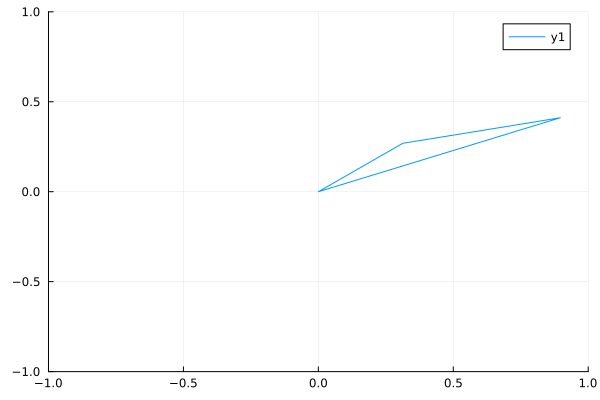

In [4]:
test_triangle = polygons[1][1,:],polygons[1][2,:] #pol1
plot(test_triangle, xlim=(-1,1), ylim=(-1, 1))

In [5]:
display(test_triangle)

([0.0, 0.8966754256594077, 0.8966754256594077, 0.3128905444439045, 0.3128905444439045, 6.661338147750939e-16], [0.0, 0.4112123902261636, 0.4112123902261636, 0.26911013170280496, 0.26911013170280496, -1.6653345369377348e-16])

This is gonna be our triangle, for testing purposes.

In [6]:
Q = [0.7071 -0.7071 0
     0.7071  0.7071 0
        0       0   1]

norm(Q)

1.7320397339553153

In [7]:
function generate_points(Q)
    
    x=Q[:,1]
    y=Q[:,2]
    z=x+im*y
    e=z.^2
    E=[real(e)' ; imag(e)']
    points = sum_polygon(E)
    return points
end

generate_points (generic function with 1 method)

3×3 Matrix{Float64}:
 -0.751412   0.394368   0.528994
 -0.620852  -0.694022  -0.364495
  0.223393  -0.602325   0.766355

2×6 Matrix{Float64}:
 0.0   0.409093   0.409093  0.312885  0.312885  -6.00124e-6
 0.0  -0.592666  -0.592666  0.269105  0.269105  -5.16153e-6

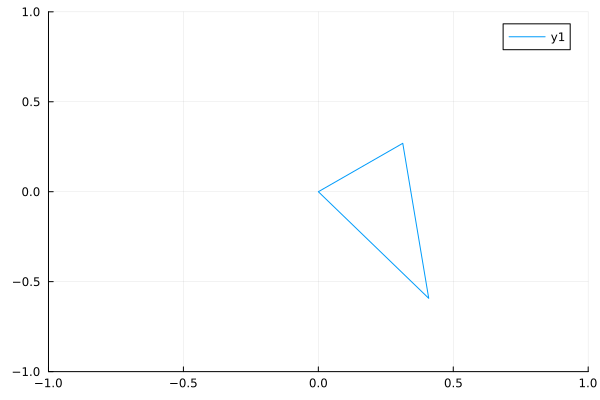

In [8]:
polygons_test = Matrix{Float64}[]

# Left Rotation
left_rotated_base = Q*q1
display(left_rotated_base)

left_rotation_test = generate_points(left_rotated_base)
display(left_rotation_test)

# Left rotation in the first position
push!(polygons_test, left_rotation_test)

plot(polygons_test[1][1,:], polygons_test[1][2,:], xlim=(-1,1), ylim=(-1, 1))

3×3 Matrix{Float64}:
 -0.835959   0.536305   0.11632
 -0.478915  -0.609475  -0.631798
 -0.267943  -0.583865   0.766355

2×6 Matrix{Float64}:
 0.0   0.411205   0.411205   0.269105   0.269105  -2.77556e-16
 0.0  -0.896658  -0.896658  -0.312885  -0.312885  -4.44089e-16

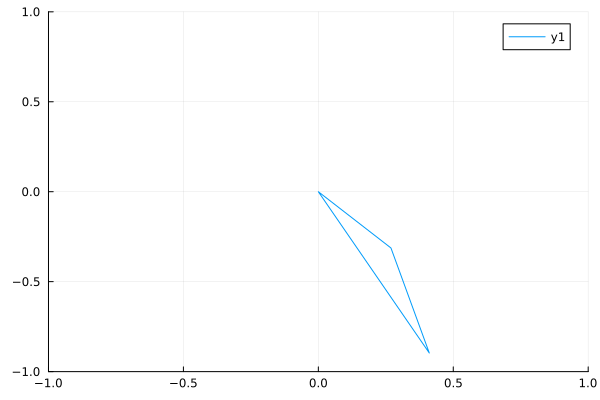

In [9]:
# Right Rotation
right_rotated_base = q1*Q
display(right_rotated_base)

right_rotation_test = generate_points(right_rotated_base)
display(right_rotation_test)

# Right rotation in the second position
push!(polygons_test, right_rotation_test)

plot(polygons_test[2][1,:], polygons_test[2][2,:], xlim=(-1,1), ylim=(-1, 1))

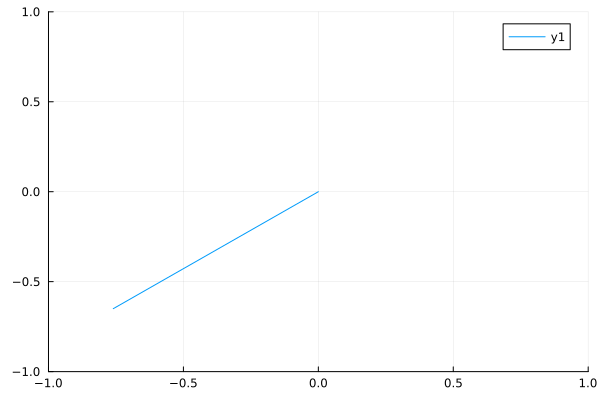

In [10]:
# 2 sides
two_side_test, q4 = generate_polygon(2)

push!(polygons_test, two_side_test)

plot(polygons_test[3][1,:], polygons_test[3][2,:], xlim=(-1,1), ylim=(-1, 1))

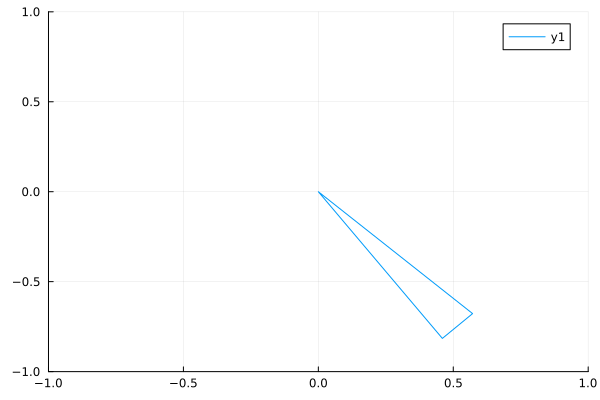

In [20]:
two_side_test, q4 = generate_polygon(3)



plot(two_side_test[1,:], two_side_test[2,:], xlim=(-1,1), ylim=(-1, 1))